In [47]:
import pandas as pd
import numpy as np
import pymysql
import matplotlib.pylab as plt

In [2]:
sqldb = pymysql.connect(host='127.0.0.1', port=3306, 
                        user='root', passwd='root', db='dianping', charset='utf8')
df = pd.read_sql('select * from shopinfo',con=sqldb)  # 读取mysql数据
sqldb.close()

In [3]:
df['id'].is_unique  # 判断该标签是否唯一
df = df.drop_duplicates(['shopurl'])  # 去重
df = df.set_index('id')  # 重置索引
df.head()

,shopname,shopurl,shoplevel,commentnums,avgcosts,taste_score,envis_score,service_score,foodtype,locs
id,,,,,,,,,,
1,金稻源潮汕砂锅粥,http://www.dianping.com/shop/90939660,四星商户,97,111,8.0,7.6,7.9,粤菜,市中心区
2,紫苑茶馆(中心书城店),http://www.dianping.com/shop/2183908,准四星商户,694,94,7.6,8.7,7.8,粤菜,市中心区
3,禾丰记养生粥店(深圳皇庭广场店),http://www.dianping.com/shop/96496623,准四星商户,147,61,7.1,7.7,7.3,粤菜,市中心区
4,皇庭荟(深圳店),http://www.dianping.com/shop/6008334,四星商户,881,201,7.8,9.0,8.1,粤菜,市中心区
5,有机会健康主题餐厅(深业店),http://www.dianping.com/shop/22222370,四星商户,371,145,8.1,8.2,8.3,粤菜,市中心区


In [4]:
# 分析一,评论人气餐厅TOP5
def strtoint(strdata):
    try:
        return int(strdata)
    except:
        return np.nan
df['commentnums'] = df['commentnums'].map(strtoint)  # 将评论数转化成数字类型
df['commentnums'].isnull().sum()  # 查看缺失数据
Top5 = df['commentnums'].sort_values(ascending=False).head(5).index  # 评论数降序排序
Top5 = df.loc[Top5]  # 基于标签索引
Top5

,shopname,shopurl,shoplevel,commentnums,avgcosts,taste_score,envis_score,service_score,foodtype,locs
id,,,,,,,,,,
13771,幸福西饼生日蛋糕(布心店),http://www.dianping.com/shop/4707354,四星商户,20464,60,8.5,8.6,8.7,面包甜点,布心
973,利宝阁(嘉里店),http://www.dianping.com/shop/15104339,准五星商户,14061,170,8.7,9.1,8.4,粤菜,市中心区
8269,四海一家(益田假日广场店),http://www.dianping.com/shop/2340253,准四星商户,11912,180,7.0,7.5,7.0,自助餐,益田假日
107196,西贝莜面村(深圳香蜜湖店),http://www.dianping.com/shop/1946344,准五星商户,10104,110,8.5,8.6,8.4,西北菜,香蜜湖
35120,缪氏川菜(南山店),http://www.dianping.com/shop/2511526,四星商户,9673,68,7.8,8.1,8.1,川菜,南头


In [5]:
# 转换成数值类型,多列同时转换
df[['avgcosts','taste_score','envis_score','service_score']] = \
    df[['avgcosts','taste_score','envis_score','service_score']].apply(pd.to_numeric)

In [37]:
# 分析二,选取高评论商户（评论数量在5K以上），再按口味、环境、服务顺序排序结果
commentTop = df[df['commentnums'] > 5000]  # 筛选出高评论商户
# 对三项评分求均值
avgscore = commentTop[['taste_score','envis_score','service_score']].mean(axis=1).round(2)  
scoreTop = avgscore.sort_values(ascending=False).head(5).index
scoreTop5 = commentTop.loc[scoreTop]
scoreTop5  # 综合评论数量，及口味、环境、服务3项目评分 TOP5

,shopname,shopurl,shoplevel,commentnums,avgcosts,taste_score,envis_score,service_score,foodtype,locs
id,,,,,,,,,,
973,利宝阁(嘉里店),http://www.dianping.com/shop/15104339,准五星商户,14061,170,8.7,9.1,8.4,粤菜,市中心区
79142,姜虎东白丁烤肉(创业路店),http://www.dianping.com/shop/32631110,准五星商户,5510,130,8.7,8.6,8.8,韩国料理,南油
82664,云海肴云南菜(海岸城店),http://www.dianping.com/shop/23127112,准五星商户,5168,91,8.3,8.9,8.9,其他美食,海岸城
107295,西贝莜面村(深圳欢乐海岸店),http://www.dianping.com/shop/5329521,准五星商户,5588,87,8.6,8.7,8.7,西北菜,欢乐海岸
36659,缪氏川菜(龙华九方店),http://www.dianping.com/shop/19282311,准五星商户,7834,68,8.2,8.8,8.8,川菜,民治


In [39]:
# 分析三,最贵的餐厅,吃什么
costTop5 = df.loc[df['avgcosts'].sort_values(ascending=False).head(5).index] 
costTop5

,shopname,shopurl,shoplevel,commentnums,avgcosts,taste_score,envis_score,service_score,foodtype,locs
id,,,,,,,,,,
66845,花舞印象.Art by teamLab,http://www.dianping.com/shop/95991286,准五星商户,68,2333,8.4,9.1,8.7,日本料理,华侨城
66377,鮨一日本料理(南山店),http://www.dianping.com/shop/97746405,准五星商户,36,1788,8.9,8.8,9.1,日本料理,南油
68299,鮨一日本料理(大中华店),http://www.dianping.com/shop/73414625,五星商户,229,1715,9.1,9.0,9.3,日本料理,岗厦
66014,鮨文Sushi Man,http://www.dianping.com/shop/98351787,五星商户,91,1480,9.2,9.1,9.1,日本料理,市中心区
66863,江户前怀石料理,http://www.dianping.com/shop/92756789,准五星商户,62,1458,8.4,8.8,8.7,日本料理,华侨城


In [41]:
# 分析四,众口难调，口味评分最高的是多少?
tasteTop = df.loc[df['taste_score'].sort_values(ascending=False).head(5).index]
tasteTop

,shopname,shopurl,shoplevel,commentnums,avgcosts,taste_score,envis_score,service_score,foodtype,locs
id,,,,,,,,,,
66014,鮨文Sushi Man,http://www.dianping.com/shop/98351787,五星商户,91,1480,9.2,9.1,9.1,日本料理,市中心区
90998,必胜客(新海上世界店),http://www.dianping.com/shop/18987313,五星商户,962,64,9.2,9.2,9.1,西餐,蛇口
23460,KONOMI Coffee,http://www.dianping.com/shop/98330098,五星商户,102,32,9.2,9.0,9.3,咖啡厅,科技园
93444,乐凯撒·榴莲比萨(欢乐颂购物中心店),http://www.dianping.com/shop/32706957,五星商户,456,66,9.1,9.1,9.0,西餐,南头
67778,我爱寿司·有炙气,http://www.dianping.com/shop/67657734,五星商户,534,85,9.1,8.7,9.1,日本料理,新安


16859


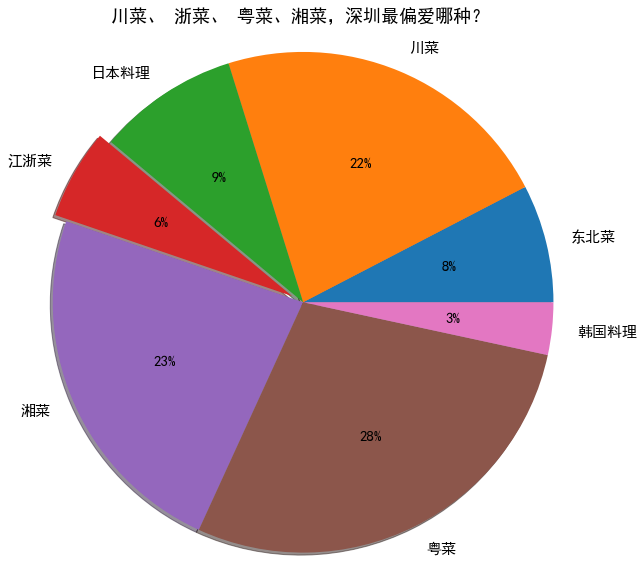

In [72]:
# 分析五,川菜、 江浙菜、 粤菜、湘菜...，深圳最偏爱哪种？
fliterData = df.loc[(df['foodtype']=='川菜')|(df['foodtype']=='江浙菜')|
                    (df['foodtype']=='粤菜')|(df['foodtype']=='湘菜')|
                    (df['foodtype']=='东北菜')|(df['foodtype']=='日本料理')|(df['foodtype']=='韩国料理')]
print(len(fliterData))
typeCount = fliterData.groupby('foodtype')['shopname'].count()
plt.figure(figsize=(10,10))
plt.rc('font',family='SimHei',size=15)
plt.title(u'川菜、 浙菜、 粤菜、湘菜，深圳最偏爱哪种？')
explode = [0]*len(typeCount)  # 每一块离开中心距离
explode[3] = 0.1
plt.pie(typeCount,radius=2,autopct='%1.f%%',shadow=True,labels=typeCount.index,explode=explode)
plt.axis('equal')
plt.show()